In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import random
import pylab as pl
from sklearn.metrics import confusion_matrix,accuracy_score
train_path="dataset/train"
class_names=os.listdir(train_path)

### просто добавляем датасет

In [5]:
image_paths=[]
image_classes=[]

def img_list(path):
    return (os.path.join(path,f) for f in os.listdir(path))

for training_name in class_names:
    dir_=os.path.join(train_path,training_name)
    class_path = img_list(dir_)
    image_paths+=class_path
    
image_classes_0=[0]*(len(image_paths)//2)
image_classes_1=[1]*(len(image_paths)//2)
image_classes=image_classes_0 + image_classes_1 + [1]

D = []

for i in range(len(image_paths)):
    D.append((image_paths[i],image_classes[i]))
    
print(D)
    
dataset = D
train = dataset[:15]
test = dataset[15:]

image_paths, y_train = zip(*train)
image_paths_test, y_test = zip(*test)

[('dataset/train\\artist\\mona_original.png', 0), ('dataset/train\\other_artist\\Jan_van_Eyck_1.jpg', 0), ('dataset/train\\other_artist\\Jan_van_Eyck_10.jpg', 0), ('dataset/train\\other_artist\\Jan_van_Eyck_11.jpg', 0), ('dataset/train\\other_artist\\Jan_van_Eyck_12.jpg', 0), ('dataset/train\\other_artist\\Jan_van_Eyck_13.jpg', 0), ('dataset/train\\other_artist\\Jan_van_Eyck_14.jpg', 0), ('dataset/train\\other_artist\\Jan_van_Eyck_15.jpg', 0), ('dataset/train\\other_artist\\Jan_van_Eyck_16.jpg', 0), ('dataset/train\\other_artist\\Jan_van_Eyck_17.jpg', 0), ('dataset/train\\other_artist\\Jan_van_Eyck_18.jpg', 0), ('dataset/train\\other_artist\\Jan_van_Eyck_19.jpg', 0), ('dataset/train\\other_artist\\Jan_van_Eyck_2.jpg', 0), ('dataset/train\\other_artist\\Jan_van_Eyck_20.jpg', 0), ('dataset/train\\other_artist\\Jan_van_Eyck_21.jpg', 0), ('dataset/train\\other_artist\\Jan_van_Eyck_22.jpg', 0), ('dataset/train\\other_artist\\Jan_van_Eyck_23.jpg', 0), ('dataset/train\\other_artist\\Jan_van_E

### Извлечение признаков при помощи SIFT

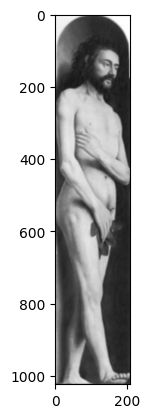

In [7]:
des_list=[]
orb=cv2.SIFT_create()
image=cv2.imread(image_paths[10])
plt.imshow(image)

### Функция внесения ключевых точек

In [ ]:
def draw_keypoints(vis, keypoints, color = (0, 255, 255)):
    for kp in keypoints:
            x, y = kp.pt
            plt.imshow(cv2.circle(vis, (int(x), int(y)), 2, color))

### Нанесение ключевых точек

(< cv2.KeyPoint 00000188F307EEE0>, < cv2.KeyPoint 00000188F307F000>, < cv2.KeyPoint 00000188F307E9A0>, < cv2.KeyPoint 00000188F307E850>, < cv2.KeyPoint 00000188F307FE70>, < cv2.KeyPoint 00000188F307EAC0>, < cv2.KeyPoint 00000188F307EA30>, < cv2.KeyPoint 00000188F307F900>, < cv2.KeyPoint 00000188F307EA60>, < cv2.KeyPoint 00000188F307ED90>, < cv2.KeyPoint 00000188F307F7B0>, < cv2.KeyPoint 00000188F307EE20>, < cv2.KeyPoint 00000188F307ECA0>, < cv2.KeyPoint 00000188F307ECD0>, < cv2.KeyPoint 00000188F307F030>, < cv2.KeyPoint 00000188F307FC90>, < cv2.KeyPoint 00000188F307FC60>, < cv2.KeyPoint 00000188F307FBD0>, < cv2.KeyPoint 00000188F307E790>, < cv2.KeyPoint 00000188F307EDC0>, < cv2.KeyPoint 00000188F307E9D0>, < cv2.KeyPoint 00000188F307FED0>, < cv2.KeyPoint 00000188F307F240>, < cv2.KeyPoint 00000188F307F210>, < cv2.KeyPoint 00000188F307ED30>, < cv2.KeyPoint 00000188F307F600>, < cv2.KeyPoint 00000188F307E5B0>, < cv2.KeyPoint 00000188F307E610>, < cv2.KeyPoint 00000188F307E640>, < cv2.KeyPoin

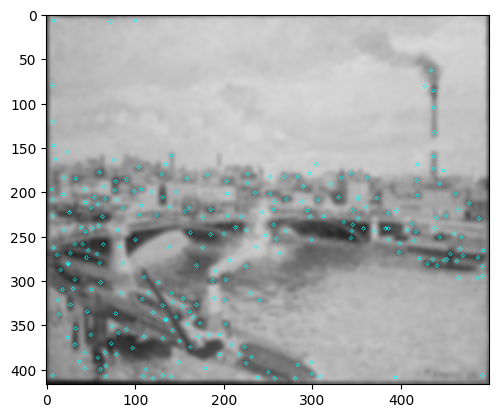

In [ ]:
kp = orb.detect(image,None)
print(kp)
kp, des = orb.compute(image, kp)
print(kp)
img=draw_keypoints(image, kp)

### Добавление дескрипторов обучающих изображений в список

In [ ]:
for image_path in image_paths:
    im=cv2.imread(image_path)
    kp=orb.detect(im,None)
    keypoints, descriptor= orb.compute(im, kp)
    des_list.append((image_path, descriptor))
    

In [ ]:
descriptors=des_list[0][1]
for image_path, descriptor in des_list[1:]:
    descriptors=np.vstack((descriptors,descriptor))
print(des_list)
    
descriptors_float=descriptors.astype(float)

[('dataset/train\\artist\\mona_original.png', array([[  1.,   9.,  76., ...,  48.,   8.,   0.],
       [  4.,   0.,  15., ...,   1.,   0.,   0.],
       [  0.,   5.,  23., ..., 126.,   3.,   5.],
       ...,
       [ 27.,   1.,   0., ...,   0.,   0.,   0.],
       [145.,  22.,   0., ...,   0.,   0.,   0.],
       [ 13.,   1.,   0., ...,   0.,   0.,   0.]], dtype=float32)), ('dataset/train\\other_artist\\Alfred_Sisley_1.jpg', array([[  5.,  61.,  79., ...,   1.,   0.,   4.],
       [ 71.,   6.,   3., ...,   0.,   0.,   0.],
       [  8.,   1.,   0., ...,  13.,   1.,  23.],
       ...,
       [  9.,  25.,  23., ...,   0.,  32., 137.],
       [ 11.,   4.,   0., ...,   0.,  11.,  74.],
       [174.,  53.,   0., ...,   0.,   0.,   0.]], dtype=float32)), ('dataset/train\\other_artist\\Amedeo_Modigliani_1.jpg', array([[12.,  2.,  3., ...,  0.,  0.,  0.],
       [ 2.,  0.,  0., ..., 14.,  3., 12.],
       [12.,  3.,  0., ...,  1.,  4., 14.],
       ...,
       [77., 27.,  1., ...,  2.,  5.,  2

### Выполнение кластеризации K-средних по дескрипторам

In [ ]:
from scipy.cluster.vq import kmeans,vq

k=50
voc,variance=kmeans(descriptors_float,k,1)
print(voc, variance)

[[22.91780822 29.76712329 36.09589041 ...  5.76712329  3.78082192
   8.73972603]
 [21.08928571  7.14285714 12.5        ...  3.25        4.10714286
   4.39285714]
 [12.13157895  6.22368421 10.30263158 ...  5.97368421  7.06578947
  11.75      ]
 ...
 [12.95180723  8.72289157  8.69879518 ... 18.24096386  6.4939759
   9.63855422]
 [23.         13.34313725 10.28431373 ... 28.78431373  5.82352941
   5.56862745]
 [71.83098592 54.54929577 17.57746479 ... 11.98591549 15.85915493
  19.67605634]] 303.87204879269063


### Создание гистограммы обучающего изображения


In [ ]:
im_features=np.zeros((len(image_paths),k),"float32")
for i in range(len(image_paths)):
    words,distance=vq(des_list[i][1],voc)
    for w in words:
        im_features[i][w]+=1
print(im_features)

[[ 0.  1.  2.  3.  0.  3.  0.  2.  0.  2.  2.  0.  2.  0.  0.  1.  2.  2.
   1.  0.  0.  0.  1.  2.  3.  2.  0.  1.  1.  0.  2.  3.  2.  0.  2.  1.
   1.  1.  1.  0.  3.  1.  1.  7.  0.  3.  0.  0.  3.  0.]
 [ 4.  1.  3.  1.  0.  1.  8.  1.  2.  5.  1.  1.  1.  8.  2.  1.  2.  2.
   0.  2.  2.  1.  0.  1.  4.  0.  2.  7.  0.  5.  0.  9.  1.  2.  0.  0.
   2.  4.  2.  1.  3.  0.  0.  0.  6.  1.  0.  1.  2.  0.]
 [ 0.  0.  3.  3.  0.  0.  2.  1.  0.  5.  2.  0.  1.  0.  1.  0.  1.  1.
   5.  0.  2.  1.  1.  0.  0.  1.  1.  0.  3.  2.  0.  4.  2.  0.  1.  2.
   1.  0.  0.  0.  1.  2.  3.  3.  1.  1.  6.  3.  5.  2.]
 [ 4.  1.  7.  2.  4.  1.  0.  5.  1.  5.  0.  4.  2.  1.  5.  4.  6.  7.
   3.  4.  5.  4.  2.  7. 12.  2.  4.  4. 11.  0.  6.  2.  2.  3.  6.  3.
   2.  2.  1.  1.  7.  5.  1.  4.  5.  0.  3.  2.  4.  2.]
 [12.  1.  4.  2.  5.  1.  8.  0.  5.  4.  1. 10.  2. 12.  0.  1.  1.  4.
   0.  0. 10.  7.  0.  1.  1.  0.  0.  6.  2.  5.  0.  6.  0.  0.  3.  0.
   0. 11.  6.  0.  6.  0

### Применение стандартизации к функции обучения

In [ ]:
from sklearn.preprocessing import StandardScaler
stdslr=StandardScaler().fit(im_features)
im_features=stdslr.transform(im_features)
print(im_features)

[[-0.7182017  -0.62844163 -1.161401   -1.1606889  -0.8883295  -0.7090628
  -0.9584387  -0.77150404 -1.4101012  -0.917663   -1.374104   -1.0948217
  -1.4517471  -1.2460935  -0.7175169  -0.8008161  -1.3273551  -0.69247705
  -0.28527504 -1.040833   -1.1576579  -0.05391639 -0.52527905 -1.0489298
  -1.0381745  -0.7242523  -1.0115464  -0.8059249  -1.1973814  -1.045995
  -0.6859943  -1.1767237  -0.595854   -0.39746645 -0.87465185 -0.76213974
  -0.24210006 -0.873069   -0.8934706   0.08757118 -0.6505771  -0.6713189
  -1.0330507  -0.9903328  -1.063236   -1.0364321  -0.8752137  -0.9106417
  -1.4767897  -1.6633685 ]
 [-0.6175192  -0.761211   -1.5075139  -1.1606889  -0.41243872 -1.0313641
  -1.1404207  -1.076045   -1.4101012  -0.72648317 -0.3285901  -0.9398941
  -1.4517471  -0.32468635 -0.91682714 -0.21688768 -0.86964643 -1.0072393
  -0.5803872  -0.64051265 -0.8300188  -1.2670351  -0.3576368  -1.0489298
  -0.79859567 -0.7242523  -1.0115464  -0.6773198  -1.1973814  -0.7049096
  -0.90036756 -1.176723

### Создание модели классификации с помощью SVM

In [ ]:
from sklearn.svm import LinearSVC
clf=LinearSVC(max_iter=80000)
clf.fit(im_features,np.array(y_train))

c:\Users\kolos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(max_iter=80000)

### Тестирование модели классифкации

In [ ]:
des_list_test=[]

for image_path in image_paths_test:
    image=cv2.imread(image_path)
    kp=orb.detect(image,None)
    keypoints_test,descriptor_test= orb.compute(image, kp)
    des_list_test.append((image_path,descriptor_test))
    
from scipy.cluster.vq import vq
test_features=np.zeros((len(image_paths_test),k),"float32")
for i in range(len(image_paths_test)):
    words,distance=vq(des_list_test[i][1],voc)
    for w in words:
        test_features[i][w]+=1

test_features=stdslr.transform(test_features)

true_classes=[]
for i in y_test:
    true_classes.append(i)
        
predict_classes=[]
for i in clf.predict(test_features):
    predict_classes.append(i)
print(clf.predict(test_features), true_classes)
accuracy=accuracy_score(true_classes, predict_classes)
print(accuracy)

[1 1 1 0 0] [1, 1, 1, 1, 1]
0.6
